## Tutorial: how to import the data and visualise them

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import random
from tqdm import tqdm
from hyperparticle.data_handler import ParticleDataset, OneSet

import ot
import graphicle as gcl

import matplotlib.pyplot as plt
from matplotlib.patches import Circle,ConnectionPatch

#helper functions for plots
from hyperparticle.utils.visualisation import plot_geodesic, get_colors, hard_descendants
from hyperparticle.utils.metrics import sqdist, distance_matrix, precision_and_recall, mAP

from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

2023-01-26 13:19:38.030196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 13:19:41.395089: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-26 13:20:01.779592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /local/software/slurm/default/lib::/home/gc2c20/.local/lib:/scratch/gc2c20/MadGraph5/HEPTools/lhapdf6_py3/lib:/home/gc2c20/.local/lib:/scratch/gc2c20/MadGraph5/HEPTools/lhapdf6_py3/lib
2023-01-26 13:20:01.779758:

## The dataset

The dataset is structured as a Pytorch dataset. The two inputs are the path for the data directory and the signal name (this depends on the physics event we are interested in and it is chosen once the data is generated).

The dataset spits each event as dictionary which contains a graphicle object and a hyperbolic coordinates array for each of the algorithm tree (AntiKt, CA and Kt) and for the MC truth.

In [7]:
dataset = ParticleDataset('../data/jet_tagging/train_sig/')
event = dataset[4]

In [8]:
event.keys()

dict_keys(['MC_graph', 'aKt_graph', 'aKt_hyp', 'CA_graph', 'CA_hyp', 'Kt_graph', 'Kt_hyp'])

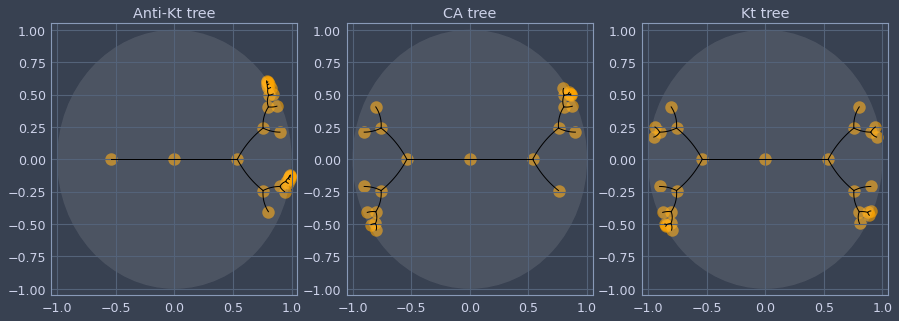

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.flatten()

keys = [k for k in event.keys()]
titles = ['Anti-Kt tree', 'CA tree', 'Kt tree',]
for k in range(1, 6, 2):
    i = k//2
    graph, hyp = event[keys[k]], event[keys[k+1]]
    graph, hyp = event[keys[k]], event[keys[k+1]]
    
    G = nx.Graph()
    G.add_edges_from(graph.edges)
    nodes = np.array(G.nodes())
    mapping = {nodes[i]: i for i in range(len(nodes))}
    G = nx.relabel_nodes(G, mapping)
    nodes = np.array(G.nodes())
    for edge in G.edges:
        start = np.where(nodes == edge[0])[0][0]
        end = np.where(nodes == edge[1])[0][0]
        x0,y0 = hyp[start]
        x1,y1 = hyp[end]
        #ax.plot([x0,x1],[y0,y1],alpha=0.1,color='black')
        plot_geodesic(hyp[start],hyp[end],ax[i])

    ax[i].scatter(hyp[:,0], hyp[:,1], c='orange', s=150, alpha=0.6)
    
    disk = Circle((0,0),1,color='white',alpha=0.1)#fill=False)
    ax[i].add_patch(disk)
    ax[i].set_xlim(-1.05,1.05)
    ax[i].set_ylim(-1.05,1.05)
    ax[i].set_title(titles[i])

plt.show()
#plt.savefig('example.png')

In [2]:
dataset = OneSet('../data/hadron2/hadron-0.hdf5')
event = dataset[4]

coordinates: (-1.2594892077359316, 1.1246483498448319)


NameError: name 'center' is not defined

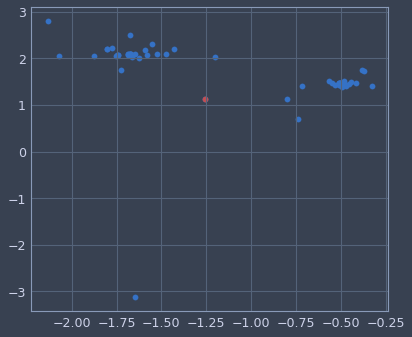

In [3]:
g = event['aKt_graph']
mask = g.final
plt.scatter(g.pmu.eta, g.pmu.phi)
max_id = np.argmax(g.pmu.pt)
eta, phi = g.pmu.eta[max_id], g.pmu.phi[max_id]
plt.scatter(eta, phi, c='r')
print(f'coordinates: {g.pmu.eta[max_id], g.pmu.phi[max_id]}')

g1 = center(g)
mask = g1.final
plt.scatter(g1.pmu.eta, g1.pmu.phi)
plt.xlim(-2.5, 2.5)
plt.ylim(-np.pi, np.pi)
plt.show()

In [ ]:
from hyperparticle.utils.c